#Import Library

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import string

# Download the dataset

In [2]:
!wget https://raw.githubusercontent.com/vrajmohan18/Datasets/main/Phishing.csv

--2021-12-28 07:57:51--  https://raw.githubusercontent.com/vrajmohan18/Datasets/main/Phishing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1223423 (1.2M) [text/plain]
Saving to: ‘Phishing.csv’

Phishing.csv        100%[===================>]   1.17M  --.-KB/s    in 0.007s  

2021-12-28 07:57:51 (168 MB/s) - ‘Phishing.csv’ saved [1223423/1223423]



#  Read the File through Pandas Library

In [3]:
y1 = pd.read_csv("Phishing.csv" )
display(y1.shape)
display(y1.head())
display("")
display(y1.tail())

(10000, 50)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000,0.250000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000,0.000000,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375,1.000000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000,0.095238,1,1,0,0,0,0.0,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000,1.000000,0,0,0,1,0,0.0,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1


''

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
9995,9996,3,1,1,50,0,0,0,0,0,0,2,1,0,9,1,0,0,0,0,0,15,10,17,0,0,0,0.096774,0.757143,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,19,33,0,0,0,0,0.161290,0.275862,0,1,0,0,0,0.129032,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,0,0,0,0,6,1,1,0,0,0,0,16,34,0,0,0,0,0.070423,0.500000,0,1,0,0,0,0.056338,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,0,1,0,0,3,1,0,0,0,0,0,15,13,13,0,0,0,0.166667,0.428571,0,1,1,0,0,0.000000,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0
9999,10000,3,1,2,52,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,10,35,0,0,0,0,0.089623,0.042553,0,1,0,0,0,0.004717,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0


# Information about Dataset

In [4]:
def display_file_info(df,df_name):
        col_name_list      = list(df.columns)
        col_data_type      = [type(col) for col in df.iloc[0,:]]
        null_count_list    = [df[col].isnull().sum() for col in col_name_list]
        unique_count_list  = [df[col].nunique() for col in col_name_list]
        memory_usage_list  = [df[col].memory_usage() for col in col_name_list]
        total_memory_usage = sum(memory_usage_list)
        df_info = pd.DataFrame({'column_name': col_name_list,
                               'column_type': col_data_type,
                               'null_count': null_count_list,
                               'unique_count':unique_count_list})
        print('-------- {} Summary --- {} x rows | {} x cols |approx {:.2f} MB:'
                                          .format(df_name , df.shape[0], df.shape[1],total_memory_usage))
        print( df_info.to_string())

########

display_file_info(y1,'Input Data')

-------- Input Data Summary --- 10000 x rows | 50 x cols |approx 4006400.00 MB:
                           column_name      column_type  null_count  unique_count
0                                   id  <class 'float'>           0         10000
1                              NumDots  <class 'float'>           0            17
2                       SubdomainLevel  <class 'float'>           0            13
3                            PathLevel  <class 'float'>           0            18
4                            UrlLength  <class 'float'>           0           226
5                              NumDash  <class 'float'>           0            25
6                    NumDashInHostname  <class 'float'>           0            10
7                             AtSymbol  <class 'float'>           0             2
8                          TildeSymbol  <class 'float'>           0             2
9                        NumUnderscore  <class 'float'>           0            16
10                

In [5]:
y1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

# Changing the column data type

In [6]:
float_dataType = y1.select_dtypes('float64').columns
for i in float_dataType:
    y1[i] = y1[i].astype('float32')

int_dataType = y1.select_dtypes('int64').columns
for j in int_dataType:
    y1[j] = y1[j].astype('int32')    

In [7]:
y1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

# Target Class

In [8]:
predict_class_count = y1.CLASS_LABEL.value_counts()
display(predict_class_count)

1    5000
0    5000
Name: CLASS_LABEL, dtype: int64

In [9]:
from plotly.offline import iplot
pred_class = ['Yes', 'No' ]
trace = go.Pie(labels = pred_class, values = predict_class_count)
data = [trace]
fig = go.Figure(data = trace)
iplot(fig)

# our dataset contains 50 columns
# splliting the data as 15, 15,20 (fto view the statistical information)

In [10]:
yx1 = y1.iloc[:,:17]
yx2 = y1.iloc[:,18:34]
yx3 = y1.iloc[:,36:]

display(yx1.shape)
display(yx2.shape)
display(yx3.shape)

(10000, 17)

(10000, 16)

(10000, 14)

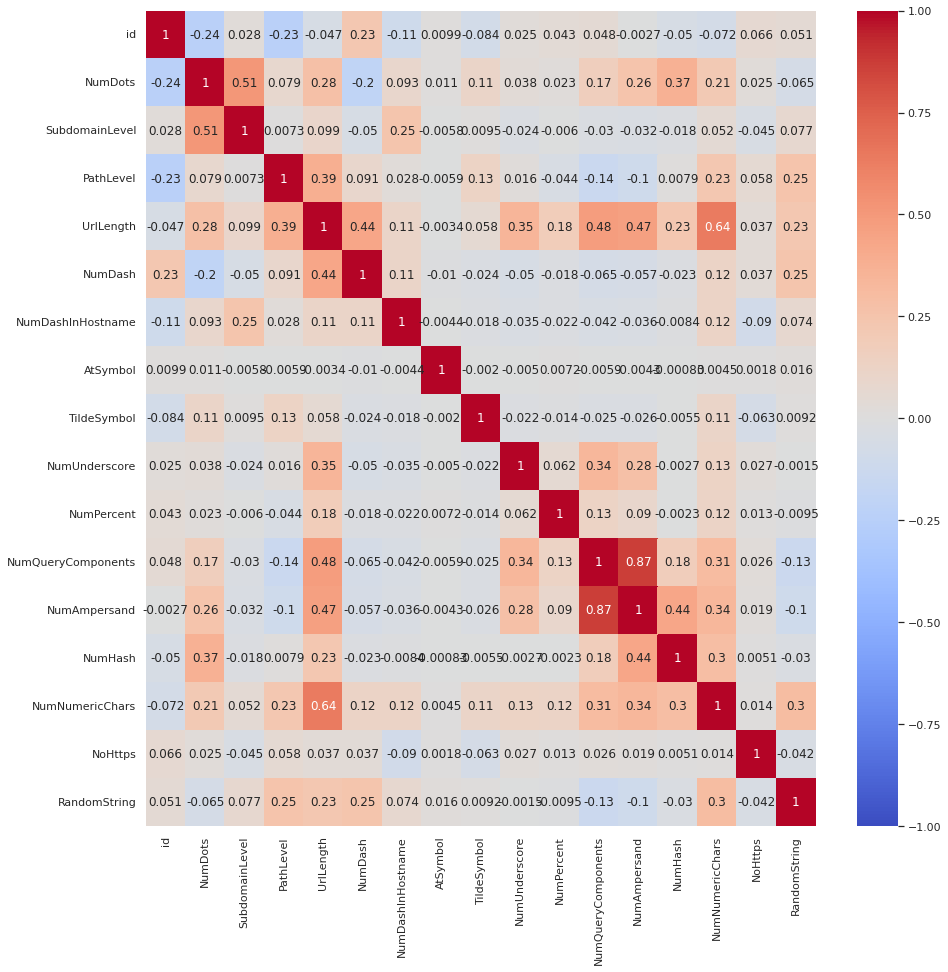

In [11]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(yx1.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

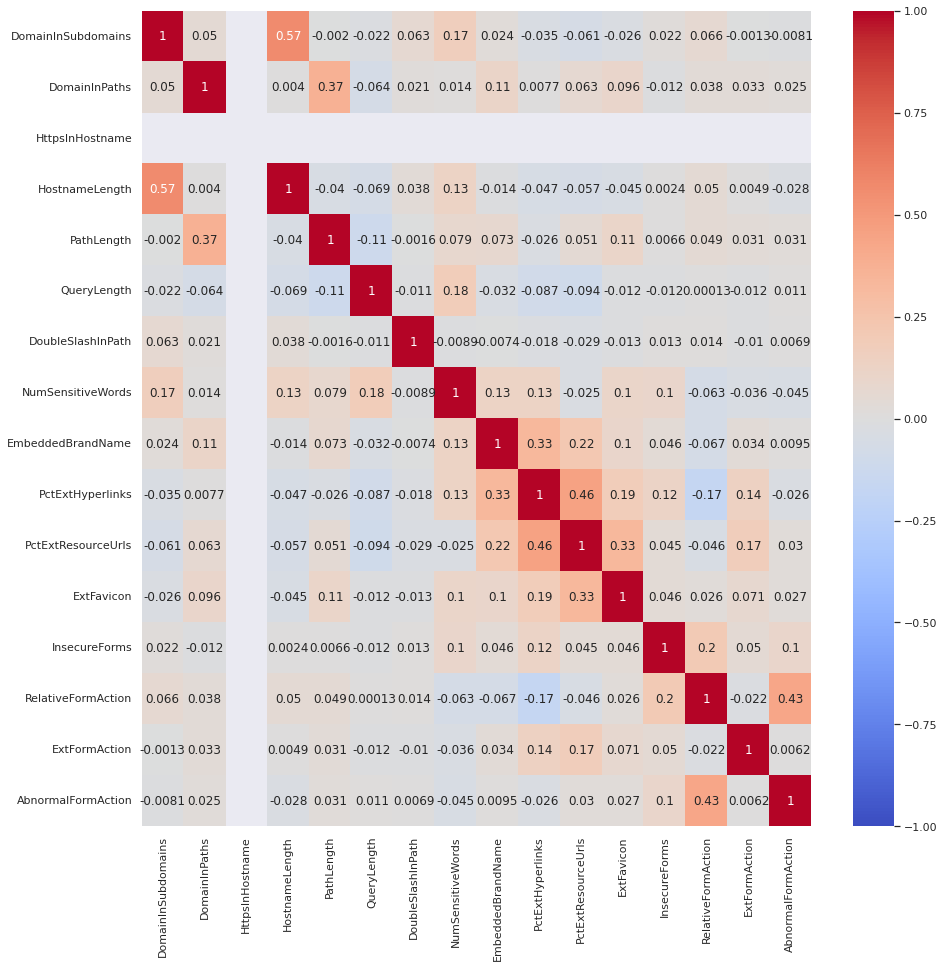

In [12]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(yx2.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

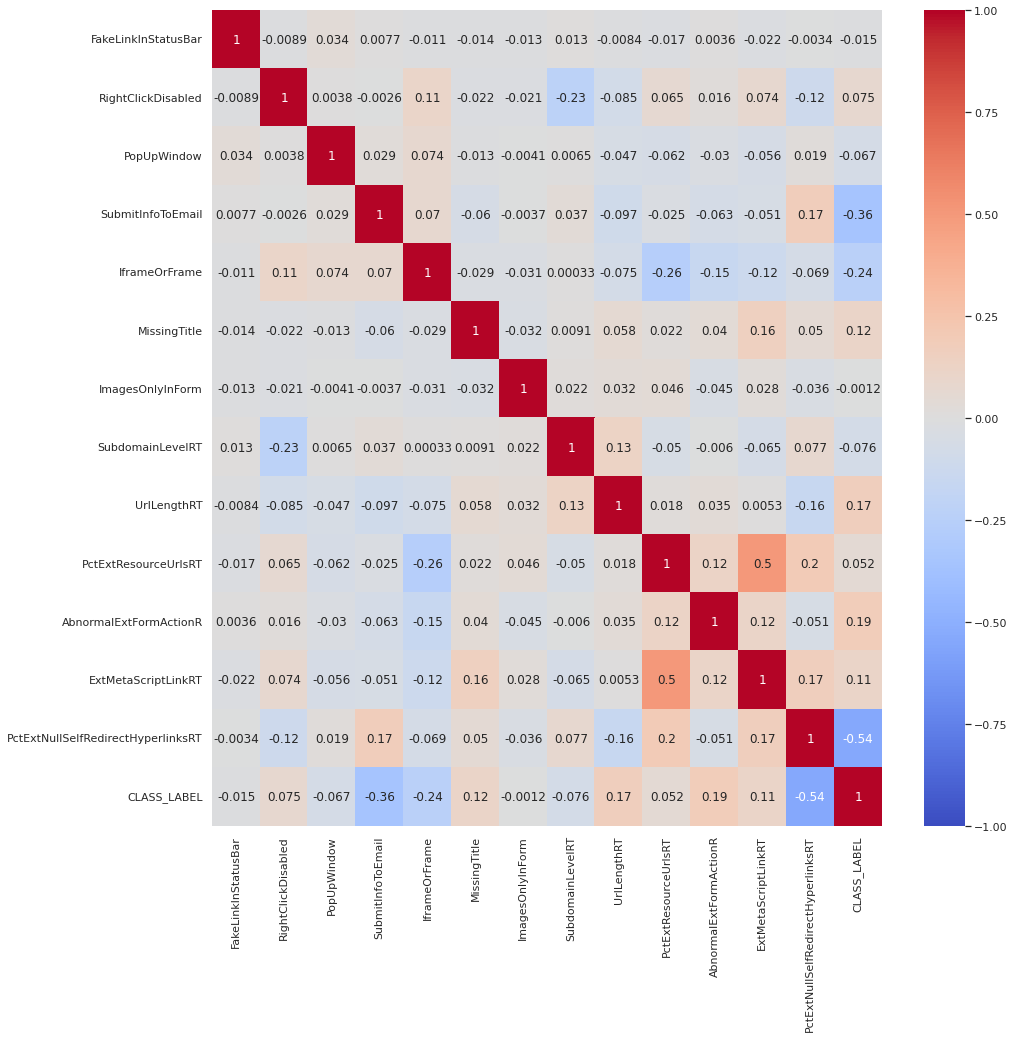

In [13]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(yx3.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

# To obtaain the mutuaal info b/t all the **columns**

In [14]:
target_class = y1['CLASS_LABEL']


In [15]:
y1_cpy = y1.copy()
y1_cpy

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000000,0.250000,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000000,0.000000,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375000,1.000000,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000000,0.095238,1,1,0,0,0,0.000000,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000000,1.000000,0,0,0,1,0,0.000000,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,0,2,1,0,9,1,0,0,0,0,0,15,10,17,0,0,0,0.096774,0.757143,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,19,33,0,0,0,0,0.161290,0.275862,0,1,0,0,0,0.129032,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,0,0,0,0,6,1,1,0,0,0,0,16,34,0,0,0,0,0.070423,0.500000,0,1,0,0,0,0.056338,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,0,1,0,0,3,1,0,0,0,0,0,15,13,13,0,0,0,0.166667,0.428571,0,1,1,0,0,0.000000,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0


In [16]:
y1_data = y1.drop(['id', 'CLASS_LABEL'], axis=1)


# getting dicrete features

In [17]:
feat_1 = y1_data.dtypes == int


In [18]:
from sklearn.feature_selection import mutual_info_classif
mutualInfo_scores = mutual_info_classif(y1_data, target_class, discrete_features=feat_1)
mutualInfo_scores = pd.Series(mutualInfo_scores, name='MI Scores', index=y1_data.columns)
mutualInfo_scores = mutualInfo_scores.sort_values(ascending=False)
mutualInfo_scores



PctExtHyperlinks                      0.468459
PctExtResourceUrls                    0.298425
PctNullSelfRedirectHyperlinks         0.238655
PctExtNullSelfRedirectHyperlinksRT    0.209978
NumNumericChars                       0.129842
FrequentDomainNameMismatch            0.124136
ExtMetaScriptLinkRT                   0.117242
NumDash                               0.109270
SubmitInfoToEmail                     0.080787
PathLength                            0.066410
InsecureForms                         0.063561
QueryLength                           0.055597
NumDots                               0.053845
PathLevel                             0.053578
NumSensitiveWords                     0.049017
UrlLength                             0.041925
NumQueryComponents                    0.039443
PctExtResourceUrlsRT                  0.032489
IframeOrFrame                         0.030356
AbnormalExtFormActionR                0.020178
HostnameLength                        0.018635
NumDashInHost

# caalculating the feature impportance

In [19]:
mutualInfo_scores_1 = mutualInfo_scores.sort_values(ascending=True)

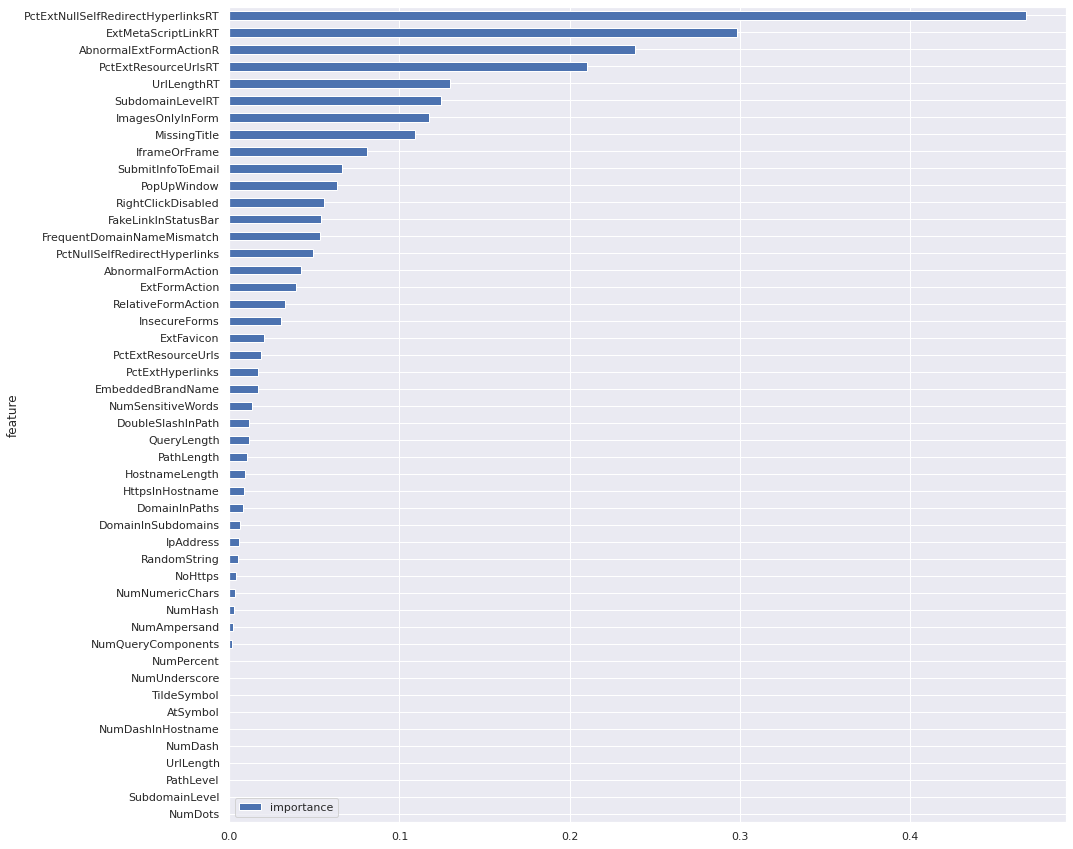

In [20]:
feature_importances = pd.DataFrame({'feature': list(y1_data.columns), 
                                    'importance': list(mutualInfo_scores_1)})
feature_importances.sort_values(by='importance', inplace=True)
feature_importances.set_index('feature', drop=True, inplace=True)
feature_importances.plot(kind='barh')

# calling the classifier

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.model_selection import cross_validate as CV
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.naive_bayes import GaussianNB as NBC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import SGDClassifier as SDC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

# data split for training & testing

In [22]:
X_train, X_test, y_train, y_test = train_test_split(y1_data , target_class, random_state=0 , test_size=0.30,stratify=target_class)
display("for training")
print(X_train.shape, y_train.shape)
display("for testing")
print(X_test.shape, y_test.shape)

'for training'

(7000, 48) (7000,)


'for testing'

(3000, 48) (3000,)


# creating an empty list to save the results (classifier)

In [23]:
model_names = []
feature_counts = []
model_acc_scores = []
model_prc_scores = []
model_rec_scores = []
model_f1_scores = []

# calling multiple classifier

In [24]:
# RFC -- Model 1
rfc_model_1 = RFC(random_state=0)
rfc_model_1.fit(X_train, y_train)
rfc_model_1_y_hat = rfc_model_1.predict(X_test)
model_names.append('rfc_model_1')
feature_counts.append(X_train.shape[1])
model_acc_scores.append(accuracy_score(y_test, rfc_model_1_y_hat))
model_prc_scores.append(precision_score(y_test, rfc_model_1_y_hat, average='micro'))
model_rec_scores.append(recall_score(y_test, rfc_model_1_y_hat, average='micro'))
model_f1_scores.append(f1_score(y_test, rfc_model_1_y_hat, average='micro'))

# RFC -- Model 2
rfc_model_2 = RFC(random_state=42, class_weight='balanced')
rfc_model_2.fit(X_train, y_train)
rfc_model_2_y_hat = rfc_model_2.predict(X_test)
model_names.append('rfc_model_2')
feature_counts.append(X_train.shape[1])
model_acc_scores.append(accuracy_score(y_test, rfc_model_2_y_hat))
model_prc_scores.append(precision_score(y_test, rfc_model_2_y_hat, average='micro'))
model_rec_scores.append(recall_score(y_test, rfc_model_2_y_hat, average='micro'))
model_f1_scores.append(f1_score(y_test, rfc_model_2_y_hat, average='micro'))

# DTC Model
dtc_model_1 = DTC(random_state=0)
dtc_model_1.fit(X_train, y_train)
dtc_model_1_y_hat = dtc_model_1.predict(X_test)
model_names.append('dtc_model_1')
feature_counts.append(X_train.shape[1])
model_acc_scores.append(accuracy_score(y_test, dtc_model_1_y_hat))
model_prc_scores.append(precision_score(y_test, dtc_model_1_y_hat, average='micro'))
model_rec_scores.append(recall_score(y_test, dtc_model_1_y_hat, average='micro'))
model_f1_scores.append(f1_score(y_test, dtc_model_1_y_hat, average='micro'))

# Navie Bayes
nbc_model_1 = NBC()
nbc_model_1.fit(X_train, y_train)
nbc_model_1_y_hat = nbc_model_1.predict(X_test)
model_names.append('nbc_model_1')
feature_counts.append(X_train.shape[1])
model_acc_scores.append(accuracy_score(y_test, nbc_model_1_y_hat))
model_prc_scores.append(precision_score(y_test, nbc_model_1_y_hat, average='micro'))
model_rec_scores.append(recall_score(y_test, nbc_model_1_y_hat, average='micro'))
model_f1_scores.append(f1_score(y_test, nbc_model_1_y_hat, average='micro'))
# Support vector
svc_model_1 = SVC(random_state=0)
svc_model_1.fit(X_train, y_train)
svc_model_1_y_hat = svc_model_1.predict(X_test)
model_names.append('svc_model_1')
feature_counts.append(X_train.shape[1])
model_acc_scores.append(accuracy_score(y_test, svc_model_1_y_hat))
model_prc_scores.append(precision_score(y_test, svc_model_1_y_hat, average='micro'))
model_rec_scores.append(recall_score(y_test, svc_model_1_y_hat, average='micro'))
model_f1_scores.append(f1_score(y_test, svc_model_1_y_hat, average='micro'))
# kNN
knc_model_1 = KNN()
knc_model_1.fit(X_train, y_train)
knc_model_1_y_hat = knc_model_1.predict(X_test)
model_names.append('knc_model_1')
feature_counts.append(X_train.shape[1])
model_acc_scores.append(accuracy_score(y_test, knc_model_1_y_hat))
model_prc_scores.append(precision_score(y_test, knc_model_1_y_hat, average='micro'))
model_rec_scores.append(recall_score(y_test, knc_model_1_y_hat, average='micro'))
model_f1_scores.append(f1_score(y_test, knc_model_1_y_hat, average='micro'))


In [25]:
df_model_eval = pd.DataFrame({'model': model_names, 'feature_count': feature_counts, 
                                    'acc': model_acc_scores,  
                                    'prc': model_prc_scores, 'rec': model_rec_scores, 
                                    'f1': model_f1_scores})
df_model_eval

,model,feature_count,acc,prc,rec,f1
0,rfc_model_1,48,0.980000,0.980000,0.980000,0.980000
1,rfc_model_2,48,0.981667,0.981667,0.981667,0.981667
2,dtc_model_1,48,0.965667,0.965667,0.965667,0.965667
3,nbc_model_1,48,0.839667,0.839667,0.839667,0.839667
4,svc_model_1,48,0.850667,0.850667,0.850667,0.850667
5,knc_model_1,48,0.857333,0.857333,0.857333,0.857333


# removing less priority features

In [26]:
y1_data_new = y1_data.copy()

In [27]:
from sklearn.feature_selection import mutual_info_classif
mutualInfo_scores = mutual_info_classif(y1_data, target_class, discrete_features=feat_1)
mutualInfo_scores = pd.Series(mutualInfo_scores, name='MI Scores', index=y1_data.columns)
mutualInfo_scores = mutualInfo_scores.sort_values(ascending=False)
mutualInfo_scores



PctExtHyperlinks                      0.467849
PctExtResourceUrls                    0.293633
PctNullSelfRedirectHyperlinks         0.237455
PctExtNullSelfRedirectHyperlinksRT    0.217446
FrequentDomainNameMismatch            0.125937
NumNumericChars                       0.121411
NumDash                               0.119132
ExtMetaScriptLinkRT                   0.117161
SubmitInfoToEmail                     0.071517
NumDots                               0.061241
PathLevel                             0.056157
PathLength                            0.054629
InsecureForms                         0.053204
NumSensitiveWords                     0.043838
NumQueryComponents                    0.043390
QueryLength                           0.042810
UrlLength                             0.040538
PctExtResourceUrlsRT                  0.033292
IframeOrFrame                         0.028597
HostnameLength                        0.026963
AbnormalExtFormActionR                0.021405
NumDashInHost

In [28]:
df_train_features = y1_data_new.drop(columns = ['DoubleSlashInPath','SubdomainLevel','FakeLinkInStatusBar','RandomString',
                     'ImagesOnlyInForm','SubdomainLevelRT', 'HttpsInHostname', 'NumHash' ,'NoHttps', 'RelativeFormAction' , 
                    'RightClickDisabled', 'ExtFavicon'  ,'AtSymbol' ,'PopUpWindow','SubdomainLevel','TildeSymbol',
                    'NumDashInHostname','DomainInSubdomains','DomainInPaths','NumAmpersand',
                    'NumPercent' ,  'MissingTitle' ,'AbnormalFormAction' ,'NumUnderscore' ,'ExtFormAction' ,
                     'EmbeddedBrandName','IpAddress'])
df_train_features.head(3)
display(df_train_features.shape)

(10000, 22)

# train test split -- new (after removing the less priority features)

In [29]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_train_features, target_class, random_state=0 , test_size=0.30,stratify=target_class)
display("for training")
print(X_train1.shape, y_train1.shape)
display("for testing")
print(X_test1.shape, y_test1.shape)

'for training'

(7000, 22) (7000,)


'for testing'

(3000, 22) (3000,)


In [30]:
# RFC -- Model 1
rfc_model_1a = RFC(random_state=0)
rfc_model_1a.fit(X_train1, y_train1)
rfc_model_1a_y_hat = rfc_model_1a.predict(X_test1)
model_names.append('rfc_model_1a')
feature_counts.append(X_train1.shape[1])
model_acc_scores.append(accuracy_score(y_test1, rfc_model_1a_y_hat))
model_prc_scores.append(precision_score(y_test1, rfc_model_1a_y_hat, average='micro'))
model_rec_scores.append(recall_score(y_test1, rfc_model_1a_y_hat, average='micro'))
model_f1_scores.append(f1_score(y_test1, rfc_model_1a_y_hat, average='micro'))

# RFC -- Model 2
rfc_model_2a = RFC(random_state=42, class_weight='balanced')
rfc_model_2a.fit(X_train1, y_train1)
rfc_model_2a_y_hat = rfc_model_2a.predict(X_test1)
model_names.append('rfc_model_2a')
feature_counts.append(X_train1.shape[1])
model_acc_scores.append(accuracy_score(y_test1, rfc_model_2a_y_hat))
model_prc_scores.append(precision_score(y_test1, rfc_model_2a_y_hat, average='micro'))
model_rec_scores.append(recall_score(y_test1, rfc_model_2a_y_hat, average='micro'))
model_f1_scores.append(f1_score(y_test1, rfc_model_2a_y_hat, average='micro'))

# DTC Model
dtc_model_1a = DTC(random_state=0)
dtc_model_1a.fit(X_train1, y_train1)
dtc_model_1a_y_hat = dtc_model_1a.predict(X_test1)
model_names.append('dtc_model_1a')
feature_counts.append(X_train1.shape[1])
model_acc_scores.append(accuracy_score(y_test1, dtc_model_1a_y_hat))
model_prc_scores.append(precision_score(y_test1, dtc_model_1a_y_hat, average='micro'))
model_rec_scores.append(recall_score(y_test1, dtc_model_1a_y_hat, average='micro'))
model_f1_scores.append(f1_score(y_test1, dtc_model_1a_y_hat, average='micro'))

# Navie Bayes
nbc_model_1a = NBC()
nbc_model_1a.fit(X_train1, y_train1)
nbc_model_1a_y_hat = nbc_model_1a.predict(X_test1)
model_names.append('nbc_model_1a')
feature_counts.append(X_train1.shape[1])
model_acc_scores.append(accuracy_score(y_test1, nbc_model_1a_y_hat))
model_prc_scores.append(precision_score(y_test1, nbc_model_1a_y_hat, average='micro'))
model_rec_scores.append(recall_score(y_test1, nbc_model_1a_y_hat, average='micro'))
model_f1_scores.append(f1_score(y_test1, nbc_model_1a_y_hat, average='micro'))
# Support vector
svc_model_1a = SVC(random_state=0)
svc_model_1a.fit(X_train1, y_train1)
svc_model_1a_y_hat = svc_model_1a.predict(X_test1)
model_names.append('svc_model_1a')
feature_counts.append(X_train1.shape[1])
model_acc_scores.append(accuracy_score(y_test1, svc_model_1a_y_hat))
model_prc_scores.append(precision_score(y_test1, svc_model_1a_y_hat, average='micro'))
model_rec_scores.append(recall_score(y_test1, svc_model_1a_y_hat, average='micro'))
model_f1_scores.append(f1_score(y_test1, svc_model_1a_y_hat, average='micro'))


In [31]:
df_model_eval = pd.DataFrame({'model': model_names, 'feature_count': feature_counts, 
                                    'acc': model_acc_scores,  
                                    'prc': model_prc_scores, 'rec': model_rec_scores, 
                                    'f1': model_f1_scores})
df_model_eval 

,model,feature_count,acc,prc,rec,f1
0,rfc_model_1,48,0.980000,0.980000,0.980000,0.980000
1,rfc_model_2,48,0.981667,0.981667,0.981667,0.981667
2,dtc_model_1,48,0.965667,0.965667,0.965667,0.965667
3,nbc_model_1,48,0.839667,0.839667,0.839667,0.839667
4,svc_model_1,48,0.850667,0.850667,0.850667,0.850667
5,knc_model_1,48,0.857333,0.857333,0.857333,0.857333
6,rfc_model_1a,22,0.976000,0.976000,0.976000,0.976000
7,rfc_model_2a,22,0.977333,0.977333,0.977333,0.977333
8,dtc_model_1a,22,0.960667,0.960667,0.960667,0.960667
9,nbc_model_1a,22,0.839333,0.839333,0.839333,0.839333


# Hyper Tunning based on GridSearch CV

In [32]:
XXX = df_train_features
yyy = target_class

In [33]:
df_train_features.to_csv('Pphising_reduce_data.csv',  index=False)

In [34]:
model_names_A = []
feature_counts_A = []
model_rec_scores_A = []
model_auc_scores_A = []
model_f1_scores_A = []

In [35]:
 hp_grid = {'n_estimators': [10, 50, 100, 200, 500], 
           'max_features': ['sqrt','log2'],
            'class_weight': [{0: 0.005, 1: 0.995}, 'balanced']}

gscv_rfc = GSCV(estimator=RFC(random_state=0), param_grid=hp_grid, cv=5, n_jobs=5, verbose=20, scoring='recall')
gscv_rfc.fit(XXX, yyy)
gscv_rfc.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'class_weight': 'balanced', 'max_features': 'sqrt', 'n_estimators': 100}

In [36]:
from sklearn.metrics import  roc_auc_score

In [37]:
cv_scoring = ['balanced_accuracy','f1', 'roc_auc', 'recall']

rfc_model_A = RFC(random_state=0,max_features='sqrt',n_estimators=100,class_weight='balanced')

cv_results_rfc_model_A = CV(rfc_model_A ,XXX,yyy, cv=5, n_jobs=5 , verbose=10 , scoring=cv_scoring)
display(cv_results_rfc_model_A)

rfc_model_A_auc = cv_results_rfc_model_A['test_roc_auc'].mean()
rfc_model_A_f1  = cv_results_rfc_model_A['test_f1'].mean()
rfc_model_A_rec = cv_results_rfc_model_A['test_recall'].mean()

print('\t\tModel Training Evaluation (Cross-Validation) Results for rfc_model_X_1: ')
print(' \n\t\t\tauc: {}  \n\t\t\tf1: {}    \n\t\t\trec: {}'
          .format( rfc_model_A_auc,rfc_model_A_f1,rfc_model_A_rec))

model_names_A.append('rfc_model_X_A')
feature_counts_A.append(XXX.shape[1])
model_auc_scores_A.append(rfc_model_A_auc)
model_f1_scores_A.append(rfc_model_A_f1)
model_rec_scores_A.append(rfc_model_A_rec)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=5)]: Done   3 out of   5 | elapsed:    3.4s remaining:    2.3s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    3.4s finished


{'fit_time': array([2.81017327, 3.12845445, 3.07357526, 3.06367564, 3.04189396]),
 'score_time': array([0.31513238, 0.24069834, 0.24771309, 0.25341439, 0.24693465]),
 'test_balanced_accuracy': array([0.971 , 0.9785, 0.98  , 0.9675, 0.971 ]),
 'test_f1': array([0.97091274, 0.9783811 , 0.97987928, 0.96751624, 0.97085427]),
 'test_recall': array([0.968, 0.973, 0.974, 0.968, 0.966]),
 'test_roc_auc': array([0.9960225, 0.997147 , 0.997366 , 0.99505  , 0.992747 ])}

		Model Training Evaluation (Cross-Validation) Results for rfc_model_X_1: 
 
			auc: 0.9956664999999999  
			f1: 0.9735087246265135    
			rec: 0.9698


In [38]:
sdc_model_1 = SDC(random_state=0,class_weight='balanced',max_iter=1000,loss='log')

cv_results_sdc_model_1 = CV(sdc_model_1 ,XXX,yyy, cv=5, n_jobs=5 , verbose=10 , scoring=cv_scoring)
display(cv_results_sdc_model_1)

sdc_model_1_auc = cv_results_sdc_model_1['test_roc_auc'].mean()
sdc_model_1_f1  = cv_results_sdc_model_1['test_f1'].mean()
sdc_model_1_rec = cv_results_sdc_model_1['test_recall'].mean()

print('\t\tModel Training Evaluation (Cross-Validation) Results for sdc_model_1: ')
print(' \n\t\t\tauc: {}  \n\t\t\tf1: {}   \n\t\t\trec: {}'
      .format( sdc_model_1_auc,sdc_model_1_f1,sdc_model_1_rec))

model_names_A.append('sdc_model_1')
feature_counts_A.append(XXX.shape[1])
model_auc_scores_A.append(sdc_model_1_auc)
model_f1_scores_A.append(sdc_model_1_f1)
model_rec_scores_A.append(sdc_model_1_rec)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.2s
[Parallel(n_jobs=5)]: Done   3 out of   5 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.9s finished


{'fit_time': array([0.75098681, 0.70655203, 0.69839978, 0.79150581, 0.79340768]),
 'score_time': array([0.02983832, 0.02903962, 0.03252459, 0.01450586, 0.00963116]),
 'test_balanced_accuracy': array([0.874 , 0.877 , 0.89  , 0.9005, 0.7635]),
 'test_f1': array([0.88034188, 0.87052632, 0.87991266, 0.90268949, 0.80748881]),
 'test_recall': array([0.927, 0.827, 0.806, 0.923, 0.992]),
 'test_roc_auc': array([0.933274, 0.957032, 0.980878, 0.949913, 0.969501])}

		Model Training Evaluation (Cross-Validation) Results for sdc_model_1: 
 
			auc: 0.9581196000000001  
			f1: 0.8681918307856374   
			rec: 0.8949999999999999


In [39]:
from sklearn.linear_model import LogisticRegression as LRC

In [40]:
lrc_model_X = LRC(random_state=0, max_iter=1000, multi_class='ovr', class_weight='balanced', solver='saga', C=0.001)

cv_results_lrc_model_X = CV(lrc_model_X, XXX,yyy, cv=5, n_jobs=5 , verbose=10 , scoring=cv_scoring)

lrc_model_X_auc = cv_results_lrc_model_X['test_roc_auc'].mean()
lrc_model_X_f1 = cv_results_lrc_model_X['test_f1'].mean()
lrc_model_X_rec = cv_results_lrc_model_X['test_recall'].mean()




print('\t\tModel Training Evaluation (Cross-Validation) Results for lrc_model_X: ')
print('\n\t\t\tauc: {}  \n\t\t\tf1: {}   \n\t\t\trec: {}'.format( lrc_model_X_auc,lrc_model_X_f1, lrc_model_X_rec))

model_names_A.append('lrc_model_X')
feature_counts_A.append(XXX.shape[1])
model_auc_scores_A.append(lrc_model_X_auc)
model_f1_scores_A.append(lrc_model_X_f1)
model_rec_scores_A.append(lrc_model_X_rec)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    3.6s remaining:    5.4s
[Parallel(n_jobs=5)]: Done   3 out of   5 | elapsed:    7.0s remaining:    4.6s


		Model Training Evaluation (Cross-Validation) Results for lrc_model_X: 

			auc: 0.9242334  
			f1: 0.8496911186484137   
			rec: 0.89


[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    7.3s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    7.3s finished


In [41]:
dtc_model_X = DTC(random_state=0, class_weight='balanced', max_features='sqrt')
cv_results_dtc_model_X = CV(dtc_model_X, XXX,yyy, cv=5, n_jobs=5 , verbose=10 , scoring=cv_scoring)

dtc_model_X_auc = cv_results_dtc_model_X['test_roc_auc'].mean()
dtc_model_X_f1 = cv_results_dtc_model_X['test_f1'].mean()
dtc_model_X_rec = cv_results_dtc_model_X['test_recall'].mean()




print('\t\tModel Training Evaluation (Cross-Validation) Results for dtc_model_X: ')
print('\n\t\t\tauc: {}  \n\t\t\tf1: {}   \n\t\t\trec: {}'.format( dtc_model_X_auc,dtc_model_X_f1, dtc_model_X_rec))

model_names_A.append('dtc_model_X')
feature_counts_A.append(XXX.shape[1])
model_auc_scores_A.append(dtc_model_X_auc)
model_f1_scores_A.append(dtc_model_X_f1)
model_rec_scores_A.append(dtc_model_X_rec)


		Model Training Evaluation (Cross-Validation) Results for dtc_model_X: 

			auc: 0.9427999999999999  
			f1: 0.9424762709541048   
			rec: 0.9378


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0576s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished


In [42]:
df_model_eval_1 = pd.DataFrame({'model': model_names_A, 'feature_count': feature_counts_A, 
                              'auc': model_auc_scores_A,
                              'f1' :model_f1_scores_A,'rec':model_rec_scores_A})

df_model_eval_1 

,model,feature_count,auc,f1,rec
0,rfc_model_X_A,22,0.995666,0.973509,0.9698
1,sdc_model_1,22,0.958120,0.868192,0.8950
2,lrc_model_X,22,0.924233,0.849691,0.8900
3,dtc_model_X,22,0.942800,0.942476,0.9378


In [43]:
display("for training")
print(X_train1.shape, y_train1.shape)
display("for testing")
print(X_test1.shape, y_test1.shape)

'for training'

(7000, 22) (7000,)


'for testing'

(3000, 22) (3000,)


# **Multilayer Perceptrons model (ANN)**

In [44]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier
mlp_mdl = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))
mlp_mdl.fit(X_train1, y_train1) # train the model

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [45]:
#predicting the target value from the model for the samples
y_test_mlp = mlp_mdl.predict(X_test1)
y_train_mlp = mlp_mdl.predict(X_train1)

In [46]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train1,y_train_mlp)
acc_test_mlp = accuracy_score(y_test1,y_test_mlp)

print("Multilayer Perceptrons: training Data Accuracy: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: test Data Accuracy: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: training Data Accuracy: 0.980
Multilayer Perceptrons: test Data Accuracy: 0.953


In [47]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [48]:
storeResults('Multilayer Perceptrons Result', acc_train_mlp, acc_test_mlp)

In [49]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Multilayer Perceptrons Result,0.98,0.953
